In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
import klib

%matplotlib inline


#AUC as metircs

In [2]:
os.chdir("E:\\ML_Competition\\Kaggle\\titanic")

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train_org = train.copy()
test_org = test.copy()

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
train_label = train["Survived"]
train_features = train.drop(columns = "Survived")

In [8]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [9]:
numeric = train_features.select_dtypes(include = np.number).columns.tolist()
categorical = train_features.select_dtypes(exclude = np.number).columns.tolist()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train , y_test = train_test_split(train_features, train_label, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 11)
(268, 11)
(623,)
(268,)


GridSpec(6, 6)

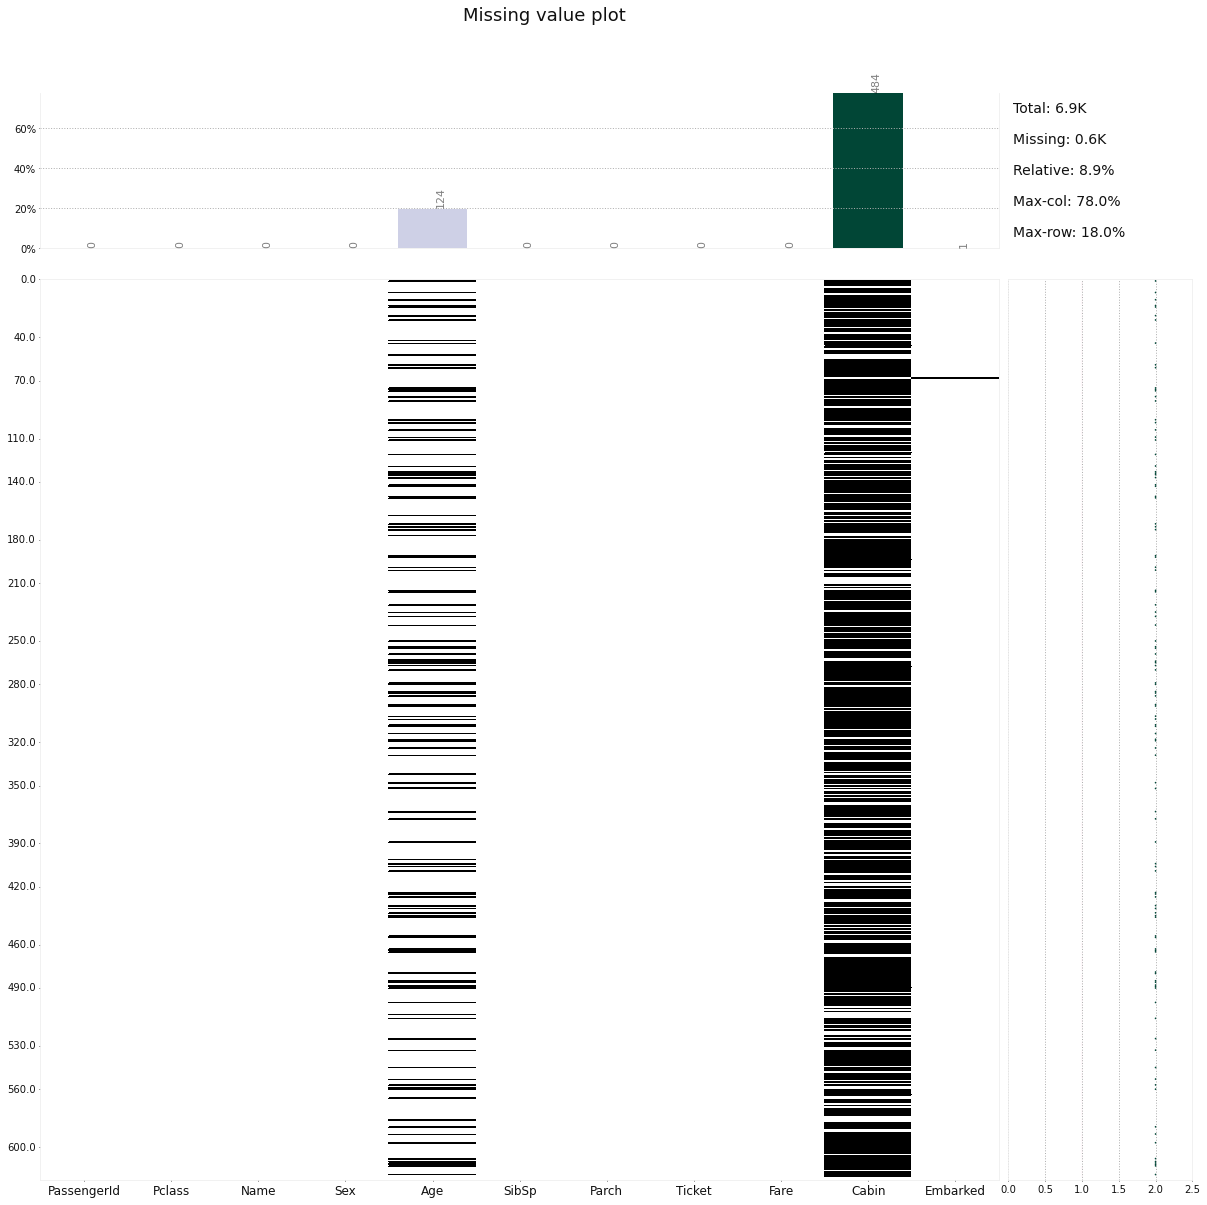

In [12]:
klib.missingval_plot(X_train)

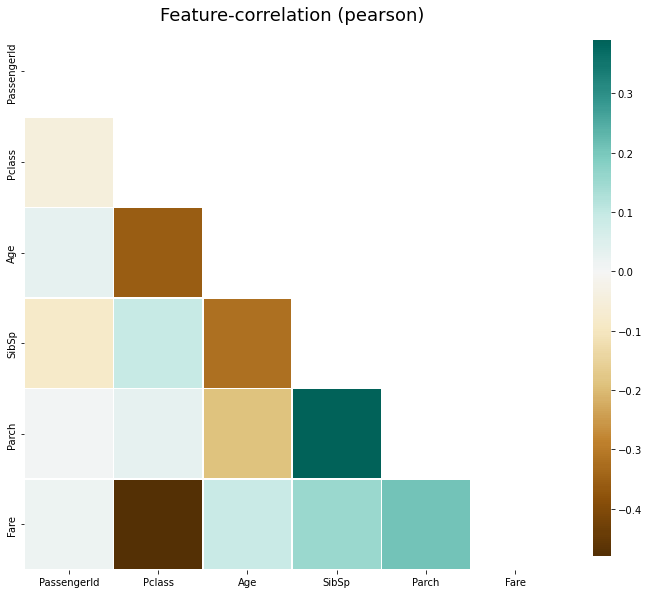

In [13]:
cor_plot = klib.corr_plot(X_train, annot=False, )

<AxesSubplot:xlabel='Survived', ylabel='Count'>

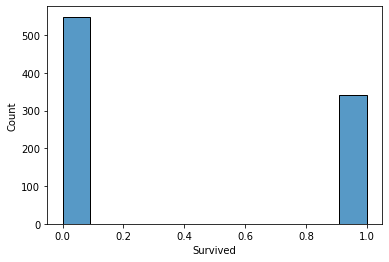

In [14]:
sns.histplot(data=train_label)

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.decomposition import PCA 

import category_encoders as ce

from sklearn.feature_selection import SelectKBest #feature selection

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression

In [77]:
tg_encoder = ce.TargetEncoder()
one_hot_encoder = ce.OneHotEncoder()
std_scaler = StandardScaler()
rf_classifier = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
lgbm_classifier = lgb.LGBMClassifier(random_state=42)
lgr_classifier = LogisticRegression(random_state=42, solver="liblinear")
cat_imputer = SimpleImputer(strategy="most_frequent")
num_imputer = SimpleImputer(strategy="mean")


drop_features = ["Name","Cabin","Ticket","PassengerId"]



num_transformer = make_pipeline(num_imputer)

cat_transformer = make_pipeline(cat_imputer,
                                one_hot_encoder)


preprocessor = Pipeline(steps=[
    ('ct', ColumnTransformer(
        transformers=[
            ('num_imp', num_transformer, numeric),
            ('cat_imp', cat_transformer, categorical),
            ("drop_fea", "drop", drop_features)],
            remainder = 'passthrough', 
            sparse_threshold=0)),
    ('std', std_scaler),
    ("fea_sele", SelectKBest(k=20))
])


pipeline_lgbm = make_pipeline(
    preprocessor,
    lgbm_classifier)

pipeline_rf = make_pipeline(
    preprocessor,
    rf_classifier)

pipeline_xgb = make_pipeline(
    preprocessor,
    xgb_classifier)

pipeline_lgr = make_pipeline(
    preprocessor,
    lgr_classifier)



pipelines = [pipeline_lgbm,
            pipeline_rf,
            pipeline_xgb,
            pipeline_lgr]


pipe_dict = {
    
    0:"LightGMB",
    1:"Random Forest",
    2:"XGBoost",
    3:"Logistics Regression"
}


for i, pipeline in enumerate(pipelines):
    
    scores = cross_val_score(pipeline, X_train, y_train,
                            scoring="accuracy", cv=5, n_jobs=-1)
    
    print("{} CV accuracy scores are {}".format(pipe_dict[i],scores))
    print("{} mean score is {}".format(pipe_dict[i],np.mean(scores)))
    print()

LightGMB CV accuracy scores are [0.816      0.856      0.768      0.81451613 0.84677419]
LightGMB mean score is 0.820258064516129

Random Forest CV accuracy scores are [0.776      0.816      0.76       0.83064516 0.83064516]
Random Forest mean score is 0.8026580645161291

XGBoost CV accuracy scores are [0.776      0.856      0.76       0.81451613 0.84677419]
XGBoost mean score is 0.8106580645161291

Logistics Regression CV accuracy scores are [0.76       0.864      0.752      0.77419355 0.83870968]
Logistics Regression mean score is 0.7977806451612904



## Predicting on X_test

In [91]:
for i, pipeline in enumerate(pipelines):
    
    best_model = pipeline.fit(X_train, y_train)
    predict = best_model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    
    print("{} X_test accuracy score is {}".format(pipe_dict[i],acc))
    print()

C:\Users\jiawe\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


LightGMB X_test accuracy score is 0.7910447761194029



C:\Users\jiawe\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Random Forest X_test accuracy score is 0.7910447761194029



C:\Users\jiawe\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\jiawe\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\jiawe\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\jiawe\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: 

XGBoost X_test accuracy score is 0.7947761194029851

Logistics Regression X_test accuracy score is 0.7910447761194029



In [131]:
final_pred = pipeline_xgb.predict(test)

C:\Users\jiawe\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [132]:
submission = pd.DataFrame(data=test["PassengerId"])
submission["Survived"] = final_pred

In [133]:
submission.to_csv("xgb_submission.csv", index=False)